Semantic Search with Text Embeddings


In [1]:
import numpy as np
import pandas as pd

from sentence_transformers import SentenceTransformer

from sklearn.decomposition import PCA
from sklearn.metrics import DistanceMetric

import matplotlib.pyplot as plt
import matplotlib as mpl

Load data

In [2]:
df_resume = pd.read_csv('resumes/resumes_train.csv')
df_resume['role'][df_resume['role'].iloc[-1] == df_resume['role']] = "Other" # relabel random role as "other"
df_resume.head()

,resume,role
0,### John Doe\n\n---\n\n#### Summary\nDetail-or...,Data Scientist
1,Creating a resume for a Data Scientist based o...,Data Scientist
2,Creating a resume for a Data Scientist...\n\n-...,Data Scientist
3,Creating a resume for a Data Scientist based o...,Data Scientist
4,## John Doe\n\n---\n\n### Summary:\nData Scien...,Data Scientist


generate embeddings

In [3]:
# import pre-trained model (full list: https://www.sbert.net/docs/pretrained_models.html)
model = SentenceTransformer("all-MiniLM-L6-v2")

# embed vectors
embedding_arr = model.encode(df_resume['resume'])
embedding_arr.shape

(100, 384)

Visualize Embeddings
PCA

In [4]:
# apply PCA to embeddings
pca = PCA(n_components=2).fit(embedding_arr)
print(pca.explained_variance_ratio_)

[0.20212616 0.12736861]


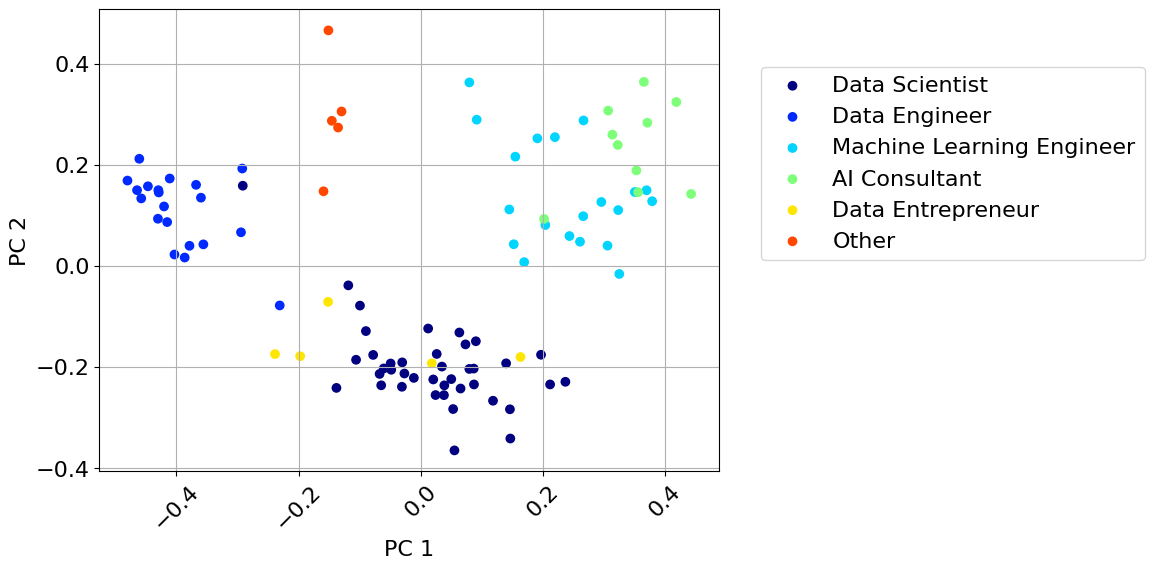

In [5]:
# plot data along PCA components
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 16})
plt.grid()

c=0
cmap = mpl.colormaps['jet']
for role in df_resume['role'].unique():
    idx = np.where(df_resume['role']==role)
    plt.scatter(pca.transform(embedding_arr)[idx,0], pca.transform(embedding_arr)[idx,1], c=[cmap(c)]*len(idx[0]), label=role)
    c = c + 1/len(df_resume['role'].unique())
    
plt.legend(bbox_to_anchor=(1.05, 0.9))
plt.xticks(rotation = 45)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()

Semantic Search

In [ ]:
# query = "I need someone to build out my data infrastructure"
# query = "Co-founder for marketing analytics consultancy"
# query = "Project manager for AI feature development"

query = "Data Engineer with Apache Airflow experience"

In [14]:
# embed query
query_embedding = model.encode(query)
print(len(query_embedding))

384


In [15]:
# define distance metric
dist = DistanceMetric.get_metric('euclidean') # other distances: manhattan, chebyshev

# compute pair wise distances between query embedding and all resume embeddings
dist_arr = dist.pairwise(embedding_arr, query_embedding.reshape(1, -1)).flatten()
# sort results
idist_arr_sorted = np.argsort(dist_arr)

In [16]:
# print roles of top 10 closest resumes to query in embedding space
print(df_resume['role'].iloc[idist_arr_sorted[:10]])

48    Data Engineer
51    Data Engineer
47    Data Engineer
46    Data Engineer
41    Data Engineer
55    Data Engineer
53    Data Engineer
40    Data Engineer
57    Data Engineer
50    Data Engineer
Name: role, dtype: object


In [17]:
# print resume closest to query in embedding space
print(df_resume['resume'].iloc[idist_arr_sorted[0]])

**John Doe**

---

**Summary:**
Highly skilled and experienced Data Engineer with a strong background in designing, implementing, and maintaining data pipelines. Proficient in data modeling, ETL processes, and data warehousing. Adept at working with large datasets and optimizing data workflows to improve efficiency.

---

**Professional Experience:**
- **Senior Data Engineer**  
  XYZ Tech, Anytown, USA  
  June 2018 - Present  
  - Designed and developed scalable data pipelines to handle terabytes of data daily.
  - Optimized ETL processes to improve data quality and processing time by 30%.
  - Collaborated with cross-functional teams to implement data architecture best practices.

- **Data Engineer**  
  ABC Solutions, Sometown, USA  
  January 2015 - May 2018  
  - Built and maintained data pipelines for real-time data processing.
  - Developed data models and implemented data governance policies.
  - Worked on data integration projects to streamline data access for business users.


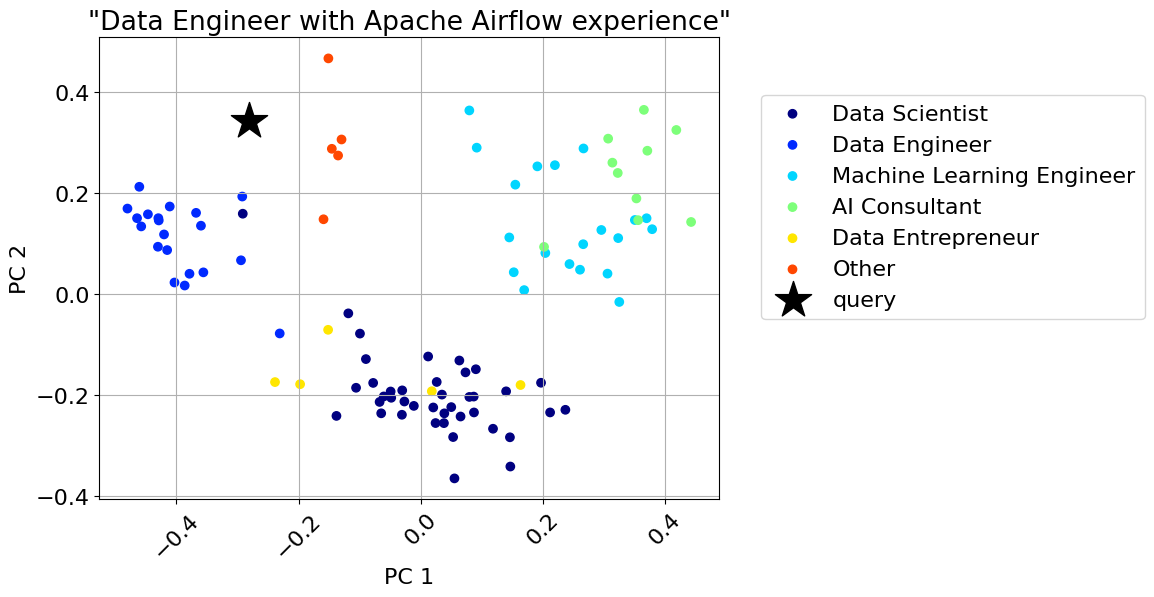

In [18]:
# plot query along with resumes using PCA components
query_pca = pca.transform(query_embedding.reshape(1, -1))[0]

plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 16})
plt.grid()

c=0
cmap = mpl.colormaps['jet']
for role in df_resume['role'].unique():
    idx = np.where(df_resume['role']==role)
    plt.scatter(pca.transform(embedding_arr)[idx,0], pca.transform(embedding_arr)[idx,1], c=[cmap(c)]*len(idx[0]), label=role)
    c = c + 1/len(df_resume['role'].unique())

plt.scatter(query_pca[0], query_pca[1], c='k', marker='*', s=750, label='query')
    
plt.legend(bbox_to_anchor=(1.05, 0.9))
plt.xticks(rotation = 45)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title('"' + query + '"')
plt.show()